<a href="https://colab.research.google.com/github/Nikhil2374/Computer-Vision/blob/main/%20Detect%20points%2C%20lines%2C%20edges%2C%20and%20boundaries%20in%20images..ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

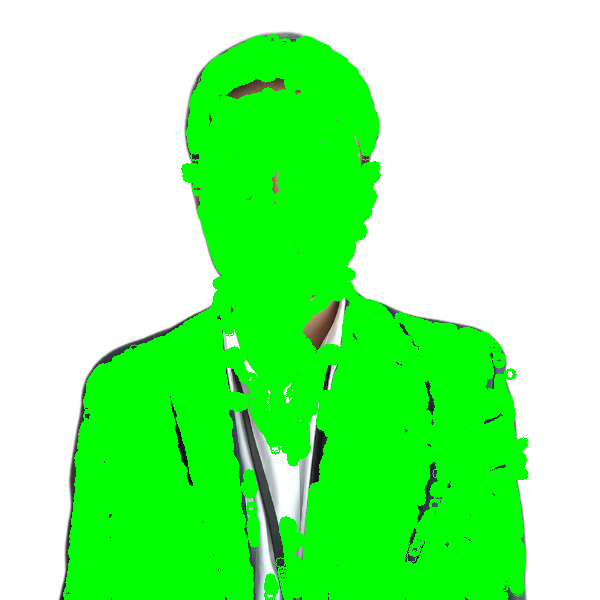

In [2]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow  # Import cv2_imshow

def point_detection(image):
    # Convert image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian blur to reduce noise
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

    # Compute image gradients
    Ix = cv2.Sobel(blurred_image, cv2.CV_64F, 1, 0, ksize=3)
    Iy = cv2.Sobel(blurred_image, cv2.CV_64F, 0, 1, ksize=3)

    # Compute second moment matrix
    Ixx = Ix ** 2
    Iyy = Iy ** 2
    Ixy = Ix * Iy

    # Define window size and initialize Harris response array
    window_size = 3
    image_height, image_width = gray_image.shape
    k = 0.04  # Empirical constant for Harris corner detection
    threshold = 10000  # Threshold for corner response
    harris_response = []

    # Compute Harris response for each pixel
    for y in range(window_size, image_height - window_size):
        for x in range(window_size, image_width - window_size):
            Sxx = np.sum(Ixx[y-window_size:y+window_size+1, x-window_size:x+window_size+1])
            Syy = np.sum(Iyy[y-window_size:y+window_size+1, x-window_size:x+window_size+1])
            Sxy = np.sum(Ixy[y-window_size:y+window_size+1, x-window_size:x+window_size+1])

            determinant = (Sxx * Syy) - (Sxy ** 2)
            trace = Sxx + Syy

            R = determinant - k * (trace ** 2)
            harris_response.append((x, y, R))

    # Threshold Harris response to detect points
    points_of_interest = []
    for response in harris_response:
        if response[2] > threshold:
            points_of_interest.append((response[0], response[1]))

    return points_of_interest

# Example usage:
# Load image
image = cv2.imread('input_image.png')

# Detect points of interest
points = point_detection(image)

# Draw points of interest on the image
for point in points:
    cv2.circle(image, point, 5, (0, 255, 0), 1)

# Display the result using cv2_imshow
cv2_imshow(image) # Use cv2_imshow instead of cv2.imshow
cv2.waitKey(0)
cv2.destroyAllWindows()